In [1]:
from pathlib import Path
import json
%cd /content/sample_data

filepath = Path()
# kaggle_key = {"username":"","key":""}

with open(f"{filepath}/kaggle.json", "w") as sample:
    json.dump(kaggle_key, sample)

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/sample_data/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d janiobachmann/bank-marketing-dataset
!unzip /content/sample_data/bank-marketing-dataset.zip
!rm -rf /content/sample_data/bank-marketing-dataset.zip

/content/sample_data
rm: cannot remove '/root/.kaggle': No such file or directory
  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 51.5MB/s]
Archive:  /content/sample_data/bank-marketing-dataset.zip
  inflating: bank.csv                


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
# import plotly.plotly as py (Depricated)
# !pip install chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
filepath = Path()
df = pd.read_csv(filepath/'bank.csv')
term_deposits = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


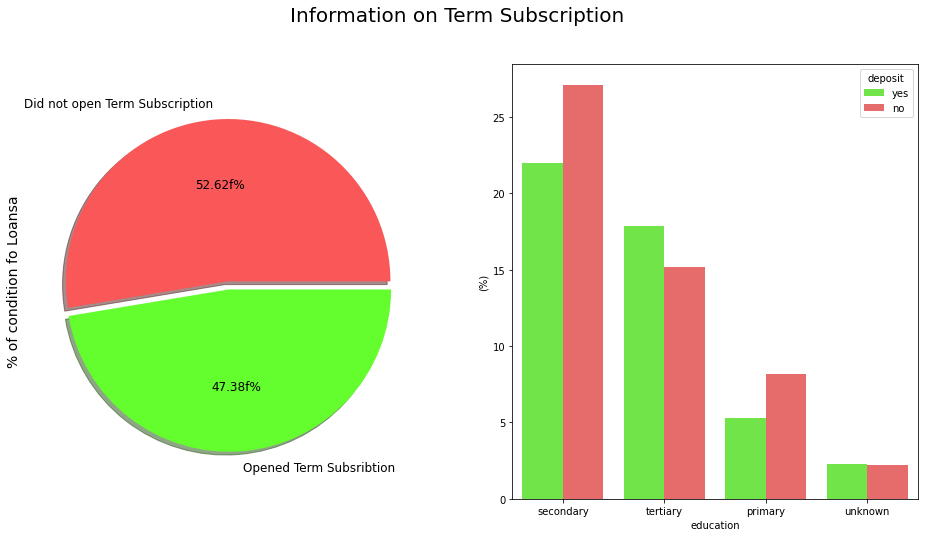

In [31]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

colors = ['#FA5858', "#64FE2E"]

labels = "Did not open Term Subscription", "Opened Term Subsribtion"

plt.suptitle('Information on Term Subscription', fontsize=20)

df.loc[:, 'deposit'].value_counts().plot.pie(explode=[0, 0.05], 
                                             autopct='%1.2ff%%',
                                             ax=ax[0],
                                             shadow = True,
                                             colors = colors,
                                             labels=labels,
                                             fontsize=12,
                                             startangle=0)
ax[0].set_ylabel('% of condition fo Loansa', fontsize=14)
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x='education', y='balance', hue='deposit', data=df, palette=palette,
            estimator = lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel = "(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()


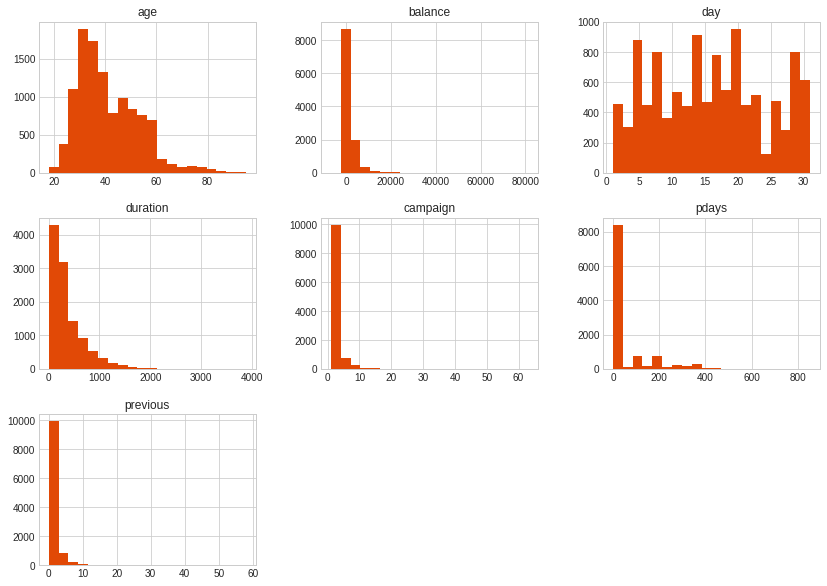

In [37]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

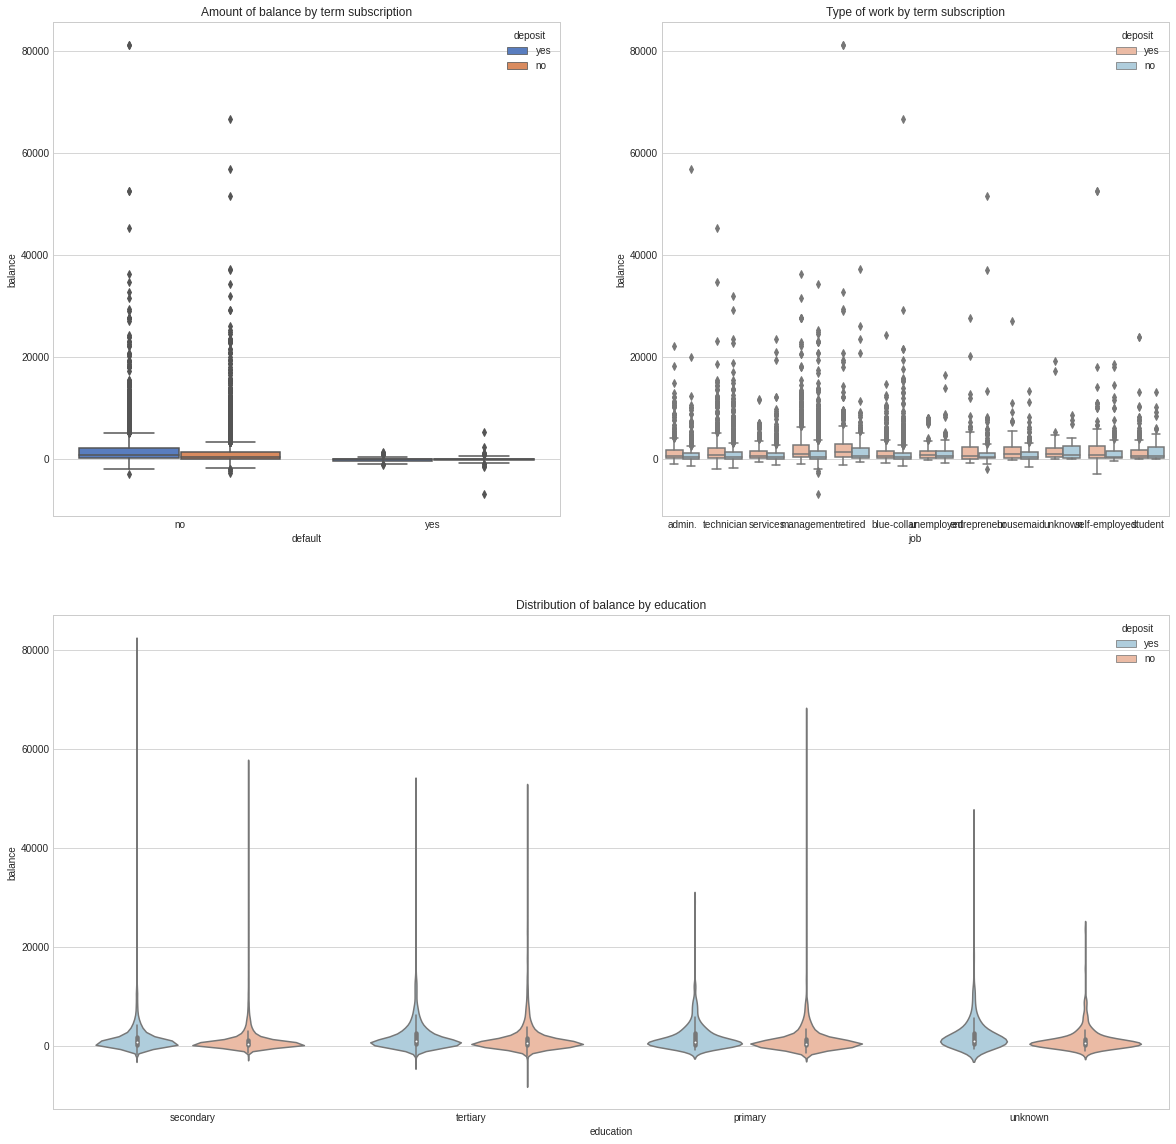

In [43]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x = "default", y='balance', hue='deposit', data=df, palette='muted', ax=ax1)
g.set_title("Amount of balance by term subscription")

g1 = sns.boxplot(x='job', y='balance', hue='deposit', data=df, palette='RdBu', ax = ax2)
g1.set_title("Type of work by term subscription")

g2 = sns.violinplot(data = df, x='education', y='balance', hue='deposit', palette='RdBu_r')
g2.set_title('Distribution of balance by education')
plt.show()

In [47]:
filt = df['job'] == 'unknown'
df.drop(df.loc[filt, :].index, inplace=True)
filt_admin_job = df['job'] == 'admin.'
df.loc[filt_admin_job, 'job'] = 'management'
df['job'].value_counts()

In [ ]:
import squarify
df = df.drop(df.loc[df["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')